In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
data = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

In [7]:
data.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [8]:
data.describe()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [9]:
data.isnull().sum()

#mitkä tiedot on tyhjiä taulukossa.

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

In [10]:
for var in data:
    print(var, data[var].unique())

number [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82]
gender [1 2]
age [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
family [1 2]
education [ 1.  2.  3.  4. nan]
years_of_service [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 nan 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]
salary [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
sat_management [3 1 2 4 5]
sat_colleques [ 3.  5.  4.  2. nan]
sat_workingEnvironment [3 2 1 5 4]
sat_salary [3 1 2 4 5]
sat_tasks [3 2 4 1 5]
healtcare [nan  1.]
holidayCabin [nan  1.]
gym [nan  1.]
muscleCar

In [11]:

df_family_counts = pd.crosstab(data['family'], data['gender'], normalize = 'columns') * 100
df_family_counts.columns = ['male', 'woman']
df_family_counts.index = ['single', 'not_single']



In [12]:
df_family_counts

,male,woman
single,44.444444,15.789474
not_single,55.555556,84.210526


Text(0.5, 0, '% of emploeeys with or without a family')

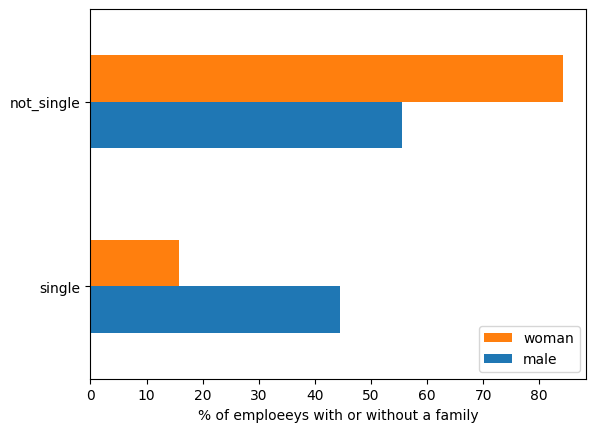

In [13]:
df_family_counts.plot.barh(legend = 'reverse')

plt.xlabel('% of emploeeys with or without a family')




In [14]:
df_family_counts.index = df_family_counts.index.astype(str)
df_family_counts.loc['Total'] = df_family_counts.sum()
df_family_counts

,male,woman
single,44.444444,15.789474
not_single,55.555556,84.210526
Total,100.000000,100.000000


In [15]:
df_family_counts = pd.crosstab(data['family'], 'Count')

df_family_counts.columns.name = ''
df_family_counts.index = ['single', 'not_single']

# Percentages
n = df_family_counts['Count'].sum()
df_family_counts['%'] = df_family_counts / n * 100

In [16]:
df_family_counts

,Count,%
single,31,37.804878
not_single,51,62.195122


IKÄ
!!!!!!111111111

In [17]:
min(data['age'])

20

In [18]:
max(data['age'])

61

In [19]:
bins = [20, 30, 40, 50, 60, 70]

In [20]:
data['age_groups'] = pd.cut(data['age'], bins = bins)

In [21]:
data

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare,age_groups
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,"(30, 40]"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,"(20, 30]"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,"(20, 30]"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,"(30, 40]"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN,"(20, 30]"
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN,"(30, 40]"
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN,"(20, 30]"
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN,"(30, 40]"


In [22]:
df_age=pd.crosstab(data['age_groups'], 'Count')

df_age.columns.name = 'ikäjakauma'

# Percentages
n = df_age['Count'].sum()
df_age['%'] = df_age / n * 100

In [23]:
df_age

ikäjakauma,Count,%
age_groups,,
"(20, 30]",19,23.456790
"(30, 40]",35,43.209877
"(40, 50]",16,19.753086
"(50, 60]",10,12.345679
"(60, 70]",1,1.234568


In [24]:
type(df_age.index.values[0])

pandas._libs.interval.Interval

In [25]:
df_age.index = df_age.index.astype(str)
df_age.loc['Total'] = df_age.sum()
df_age

ikäjakauma,Count,%
age_groups,,
"(20, 30]",19.0,23.456790
"(30, 40]",35.0,43.209877
"(40, 50]",16.0,19.753086
"(50, 60]",10.0,12.345679
"(60, 70]",1.0,1.234568
Total,81.0,100.000000


In [26]:
type(df_age.index.values[0])

str

In [27]:
df_age.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

ikäjakauma,Count,%
age_groups,,
"(20, 30]",19,23.5 %
"(30, 40]",35,43.2 %
"(40, 50]",16,19.8 %
"(50, 60]",10,12.3 %
"(60, 70]",1,1.2 %
Total,81,100.0 %


Text(0.5, 0, 'age distribution, participants = 82')

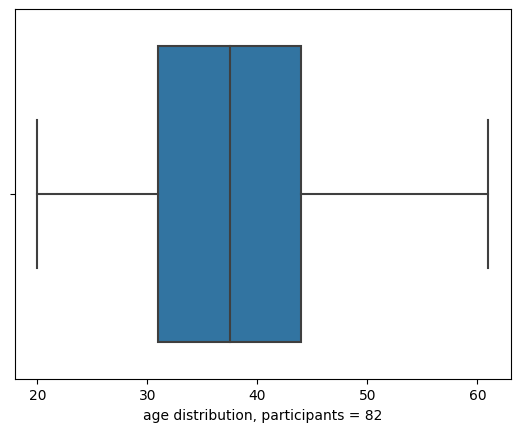

In [28]:

df_age = sns.boxplot(x = data['age'])

df_age.set_xlabel('age distribution, participants = ' + str(data['age'].count()))




PALKKA.


!!


In [34]:
df1=pd.crosstab(data['sat_salary'], 'Count')

In [35]:
df1

col_0,Count
sat_salary,
1,33
2,19
3,19
4,10
5,1


In [36]:
#palkka tyytyväisyys, henkilöt ja prosettimäärät

df1 = pd.crosstab(data['sat_salary'], 'Count')
df1['%'] = df1['Count'] / df1['Count'].sum() * 100
df1.index=['Very unsatisfied','Unsatisfied','Neutral','Satisfied','Very satisfied']
df1.columns.name = ''
df1

,Count,%
Very unsatisfied,33,40.243902
Unsatisfied,19,23.170732
Neutral,19,23.170732
Satisfied,10,12.195122
Very satisfied,1,1.219512


In [37]:
df1.index = df1.index.astype(str)
df1.loc['Total'] = df1.sum()
df1

,Count,%
Very unsatisfied,33.0,40.243902
Unsatisfied,19.0,23.170732
Neutral,19.0,23.170732
Satisfied,10.0,12.195122
Very satisfied,1.0,1.219512
Total,82.0,100.000000


In [38]:
type(df1.index.values[0])

str

In [39]:
df1.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

,Count,%
Very unsatisfied,33,40.2 %
Unsatisfied,19,23.2 %
Neutral,19,23.2 %
Satisfied,10,12.2 %
Very satisfied,1,1.2 %
Total,82,100.0 %


In [40]:
#palkkatyytyväisyys ikäluokittain

df1 = pd.crosstab(data['sat_salary'], data['age_groups'], normalize = 'columns') * 100
df1.index=['Very unsatisfied','Unsatisfied','Neutral','Satisfied','Very satisfied']




In [41]:
df1

age_groups,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Very unsatisfied,47.368421,42.857143,37.5,20.0,100.0
Unsatisfied,10.526316,20.000000,25.0,50.0,0.0
Neutral,31.578947,25.714286,25.0,0.0,0.0
Satisfied,10.526316,11.428571,12.5,20.0,0.0
Very satisfied,0.000000,0.000000,0.0,10.0,0.0


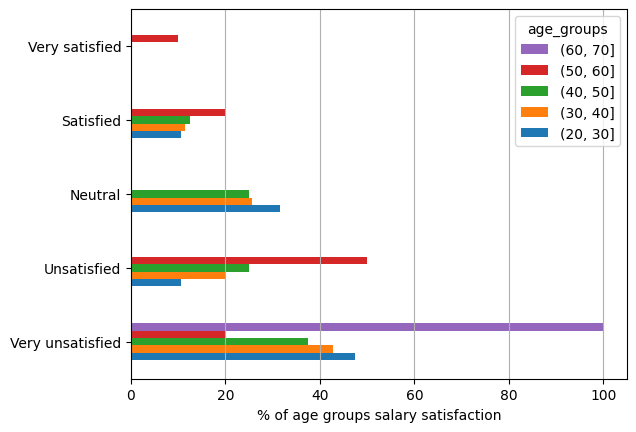

In [42]:

df1.plot.barh(legend = 'reverse')

plt.xlabel('% of age groups salary satisfaction')


plt.grid(axis = 'x')

In [43]:
df1

age_groups,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Very unsatisfied,47.368421,42.857143,37.5,20.0,100.0
Unsatisfied,10.526316,20.000000,25.0,50.0,0.0
Neutral,31.578947,25.714286,25.0,0.0,0.0
Satisfied,10.526316,11.428571,12.5,20.0,0.0
Very satisfied,0.000000,0.000000,0.0,10.0,0.0


In [44]:
from scipy.stats import chi2_contingency


chi2_contingency(df1)

(254.9020811591667,
 5.105243391772703e-45,
 16,
 array([[49.54511278, 49.54511278, 49.54511278, 49.54511278, 49.54511278],
        [21.10526316, 21.10526316, 21.10526316, 21.10526316, 21.10526316],
        [16.45864662, 16.45864662, 16.45864662, 16.45864662, 16.45864662],
        [10.89097744, 10.89097744, 10.89097744, 10.89097744, 10.89097744],
        [ 2.        ,  2.        ,  2.        ,  2.        ,  2.        ]]))

In [45]:
bins = [500, 1000, 2000, 3000, 4000, 7000]

In [46]:
data['salary_class'] = pd.cut(data['salary'], bins = bins)

In [47]:
#palkkatyytyväisyys ja palkat

df2 = pd.crosstab(data['sat_salary'], data['salary_class'])
df2.index=['Very unsatisfied','Unsatisfied','Neutral','Satisfied','Very satisfied']



In [48]:
df2

salary_class,"(1000, 2000]","(2000, 3000]","(3000, 4000]","(4000, 7000]"
Very unsatisfied,9,21,3,0
Unsatisfied,6,10,1,2
Neutral,4,13,2,0
Satisfied,0,5,2,3
Very satisfied,0,1,0,0


In [49]:
from scipy.stats import chi2_contingency


chi2_contingency(df2)

(19.085701334676404,
 0.08648111118228033,
 12,
 array([[ 7.64634146, 20.12195122,  3.2195122 ,  2.01219512],
        [ 4.40243902, 11.58536585,  1.85365854,  1.15853659],
        [ 4.40243902, 11.58536585,  1.85365854,  1.15853659],
        [ 2.31707317,  6.09756098,  0.97560976,  0.6097561 ],
        [ 0.23170732,  0.6097561 ,  0.09756098,  0.06097561]]))

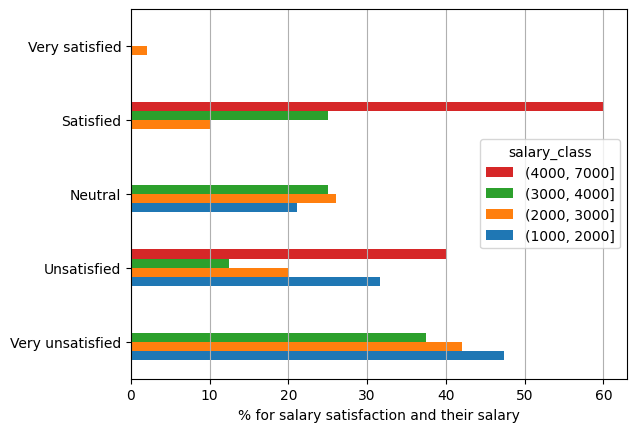

In [ ]:
df2.plot.barh(legend = 'reverse')

plt.xlabel('% for salary satisfaction and their salary')

plt.grid(axis = 'x')

years of service





!!!!


In [ ]:


min(data['years_of_service'])

0.0

In [ ]:
max(data['years_of_service'])

36.0

In [ ]:
bins = [-1, 5, 10, 15, 20, 25, 30, 35, 40]

In [ ]:
data['serviceyears'] = pd.cut(data['years_of_service'], bins = bins)

In [ ]:
data

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare,age_groups,serviceyears
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,"(30, 40]","(20, 25]"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,"(20, 30]","(5, 10]"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,"(20, 30]","(5, 10]"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,"(30, 40]","(10, 15]"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,"(20, 30]","(-1, 5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN,"(20, 30]","(-1, 5]"
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN,"(30, 40]","(-1, 5]"
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN,"(20, 30]","(5, 10]"
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN,"(30, 40]","(15, 20]"


In [ ]:
df8 = pd.crosstab(data['serviceyears'], 'Count')

df8.columns.name = ''

# Percentages
n = df8['Count'].sum()
df8['%'] = df8 / n * 100

In [ ]:
df8

,Count,%
serviceyears,,
"(-1, 5]",22,27.50
"(5, 10]",16,20.00
"(10, 15]",11,13.75
"(15, 20]",15,18.75
"(20, 25]",12,15.00
"(25, 30]",2,2.50
"(30, 35]",1,1.25
"(35, 40]",1,1.25


In [ ]:
#data['years_of_service'].hist(bins = bins)

Text(0.5, 0, 'Count and % of employees')

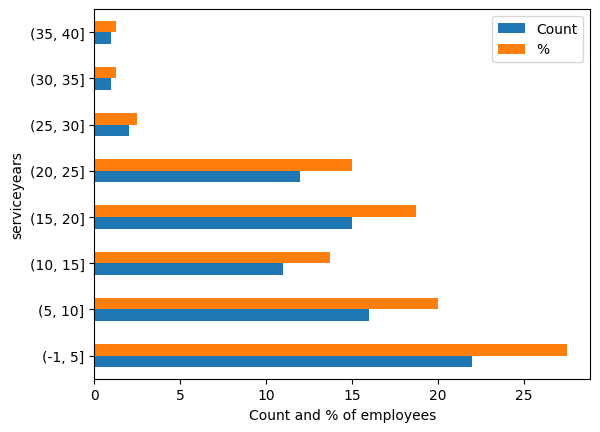

In [ ]:
df8.plot.bar(legend = 'true')

plt.xlabel('Count and % of employees')
